In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('1712831.csv')
data['NAME'].drop_duplicates('first')# how many stations used


0                 DETROIT CITY AIRPORT, MI US
7305     MOUNT CLEMENS SELFRIDGE FIELD, MI US
14906                         DEARBORN, MI US
22258              ANN ARBOR U OF MICH, MI US
29928            DETROIT METRO AIRPORT, MI US
Name: NAME, dtype: object

In [2]:
data.head(10)

,STATION,NAME,DATE,AWND,DAEV,DAPR,DAWM,EVAP,FMTM,MDEV,...,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
0,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-01,15.88,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-02,16.78,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-03,14.99,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-04,7.83,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-05,8.28,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-06,7.38,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-07,13.42,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-08,13.87,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-09,13.20,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,USW00014822,"DETROIT CITY AIRPORT, MI US",1998-01-10,13.65,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [3]:
ONE_AIRPORT = data[(data['STATION']=='USW00014822') ]
#| (data['STATION']=='USW00094847')
# USW0014822 = DETROIT CITY AIRPORT, MI US
# USW00094847 = DETROIT METRO AIRPORT, MI US
Z4 = ONE_AIRPORT[['TMIN','TMAX','WT08','AWND','WT13']] 
Y4 = Z4[['WT08']] # smoke or haze
X4 = Z4[['TMIN','TMAX','AWND']] 
X_4 = Z4[['WT13']] # 
X_4 = X_4.fillna(0)
np.where(np.isnan(X4))


(array([  55,   55,  943, 1001, 1002, 1003, 2934, 2976, 3112, 3112, 3334,
        3357, 4194, 5801, 5937, 5937, 5989, 6815, 6897, 6897, 6898, 6898,
        6899, 6899, 7047], dtype=int64),
 array([0, 1, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 1, 2, 2, 0, 1, 0, 1,
        0, 1, 2], dtype=int64))

In [4]:
Y4 = Y4.fillna(0)
Y4 = Y4[5:]
Y4.head()

,WT08
5,0.0
6,0.0
7,1.0
8,0.0
9,0.0


In [5]:
X4 = X4.fillna(X4.mean())
X4 = pd.concat([X4,X_4],axis=1)
np.where(np.isnan(X4))
# X4

(array([], dtype=int64), array([], dtype=int64))

Using previous 5 day X values to predict the Somke or haze

In [6]:
N = X4.shape[0]
N

# X_4 = pd.concat([X_4,X4[1:N-3].reset_index(),X4[2:N-2].reset_index(),X4[3:N-1].reset_index(),X4[4:N].reset_index()],axis=1)
X_4 = pd.DataFrame( X4[4:N].values,columns=['TMIN5','TMAX5','AWND5','WT13-5']).reset_index()
X_4 = pd.concat([X_4,X4[3:N-1].reset_index(),X4[2:N-2].reset_index(),X4[1:N-2].reset_index(),X4[0:N-3].reset_index()],axis=1)

X_4 = X_4.drop(columns=['index'])
X_4.columns = ['TMIN-1','TMAX-1','AWND-1','WT13-1','TMIN-2','TMAX-2','AWND-2','WT13-2','TMIN-3','TMAX-3','AWND-3','WT13-3','TMIN-4','TMAX-4','AWND-4','WT13-4','TMIN1-5','TMAX-5','AWND-5','WT13-5']
X_4 = X_4[:-2]
X_4.head()

,TMIN-1,TMAX-1,AWND-1,WT13-1,TMIN-2,TMAX-2,AWND-2,WT13-2,TMIN-3,TMAX-3,AWND-3,WT13-3,TMIN-4,TMAX-4,AWND-4,WT13-4,TMIN1-5,TMAX-5,AWND-5,WT13-5
0,42.0,55.0,8.28,1.0,36.0,43.0,7.83,1.0,47.0,55.0,14.99,1.0,38.0,50.0,16.78,0.0,18.0,41.0,15.88,0.0
1,47.0,58.0,7.38,1.0,42.0,55.0,8.28,1.0,36.0,43.0,7.83,1.0,47.0,55.0,14.99,1.0,38.0,50.0,16.78,0.0
2,37.0,47.0,13.42,1.0,47.0,58.0,7.38,1.0,42.0,55.0,8.28,1.0,36.0,43.0,7.83,1.0,47.0,55.0,14.99,1.0
3,35.0,40.0,13.87,1.0,37.0,47.0,13.42,1.0,47.0,58.0,7.38,1.0,42.0,55.0,8.28,1.0,36.0,43.0,7.83,1.0
4,35.0,40.0,13.20,1.0,35.0,40.0,13.87,1.0,37.0,47.0,13.42,1.0,47.0,58.0,7.38,1.0,42.0,55.0,8.28,1.0


In [7]:
X_4.tail()

,TMIN-1,TMAX-1,AWND-1,WT13-1,TMIN-2,TMAX-2,AWND-2,WT13-2,TMIN-3,TMAX-3,AWND-3,WT13-3,TMIN-4,TMAX-4,AWND-4,WT13-4,TMIN1-5,TMAX-5,AWND-5,WT13-5
7295,31.0,47.0,5.37,0.0,25.0,33.0,3.80,0.0,31.0,35.0,9.17,0.0,32.0,37.0,5.82,0.0,31.0,33.0,8.05,0.0
7296,33.0,47.0,13.42,0.0,31.0,47.0,5.37,0.0,25.0,33.0,3.80,0.0,31.0,35.0,9.17,0.0,32.0,37.0,5.82,0.0
7297,35.0,57.0,14.32,0.0,33.0,47.0,13.42,0.0,31.0,47.0,5.37,0.0,25.0,33.0,3.80,0.0,31.0,35.0,9.17,0.0
7298,28.0,35.0,6.26,0.0,35.0,57.0,14.32,0.0,33.0,47.0,13.42,0.0,31.0,47.0,5.37,0.0,25.0,33.0,3.80,0.0
7299,28.0,35.0,11.18,0.0,28.0,35.0,6.26,0.0,35.0,57.0,14.32,0.0,33.0,47.0,13.42,0.0,31.0,47.0,5.37,0.0


In [8]:
Y4.index = X_4.index
Y4.head()

,WT08
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0


In [9]:
print(Y4.shape[0] == X_4.shape[0])

True


In [10]:
from sklearn.model_selection import train_test_split

X4_train, X4_test, Y4_train, Y4_test = train_test_split(X_4, Y4, test_size=0.3, random_state=1)

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X4_train, Y4_train)
Y4_pred = clf.predict(X4_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y4_test, Y4_pred)

0.8027397260273973

Best hyperparameter, maxdepth = 1
Test Accuracy = 0.8100456621004566


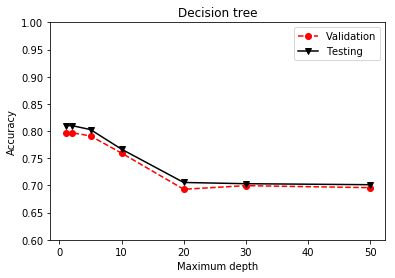

In [11]:

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1, 2, 5, 10, 20, 30, 50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X4_train, Y4_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X4_train, Y4_train)
    Y4_predTest = clf.predict(X4_test)
    testAcc[index] = accuracy_score(Y4_test, Y4_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

Repeate to DTW airport data:

In [12]:
ONE_AIRPORT = data[(data['STATION']=='USW00094847') ]
#| 
# USW0014822 = DETROIT CITY AIRPORT, MI US
# USW00094847 = DETROIT METRO AIRPORT, MI US
Z5 = ONE_AIRPORT[['TMIN','TMAX','WT08','AWND','WT13']] 
Y5 = Z5[['WT08']] # smoke or haze
X5 = Z5[['TMIN','TMAX','AWND']] 
X_5 = Z5[['WT13']] # 
X_5 = X_5.fillna(0)
np.where(np.isnan(X5))


(array([2834], dtype=int64), array([2], dtype=int64))

In [13]:
Y5 = Y5.fillna(0)
Y5 = Y5[5:]
Y5.head()


,WT08
29933,0.0
29934,0.0
29935,0.0
29936,0.0
29937,0.0


In [14]:
X5 = X5.fillna(X5.mean())
X5 = pd.concat([X5,X_5],axis=1)
np.where(np.isnan(X5))
# X5.head()

(array([], dtype=int64), array([], dtype=int64))

In [15]:
N = X5.shape[0]
N


X_5= pd.DataFrame( X5[4:N].values,columns=['TMIN5','TMAX5','AWND5','WT13-5']).reset_index()
X_5 = pd.concat([X_5,X5[3:N-1].reset_index(),X5[2:N-2].reset_index(),X5[1:N-2].reset_index(),X5[0:N-3].reset_index()],axis=1)

X_5 = X_5.drop(columns=['index'])
X_5.columns = ['TMIN-1','TMAX-1','AWND-1','WT13-1','TMIN-2','TMAX-2','AWND-2','WT13-2','TMIN-3','TMAX-3','AWND-3','WT13-3','TMIN-4','TMAX-4','AWND-4','WT13-4','TMIN1-5','TMAX-5','AWND-5','WT13-5']
X_5 = X_5[:-2]
X_5.head()

,TMIN-1,TMAX-1,AWND-1,WT13-1,TMIN-2,TMAX-2,AWND-2,WT13-2,TMIN-3,TMAX-3,AWND-3,WT13-3,TMIN-4,TMAX-4,AWND-4,WT13-4,TMIN1-5,TMAX-5,AWND-5,WT13-5
0,42.0,55.0,8.05,1.0,34.0,52.0,6.26,1.0,44.0,54.0,18.34,1.0,35.0,49.0,20.36,0.0,14.0,41.0,19.91,0.0
1,49.0,56.0,6.93,1.0,42.0,55.0,8.05,1.0,34.0,52.0,6.26,1.0,44.0,54.0,18.34,1.0,35.0,49.0,20.36,0.0
2,36.0,50.0,16.11,1.0,49.0,56.0,6.93,1.0,42.0,55.0,8.05,1.0,34.0,52.0,6.26,1.0,44.0,54.0,18.34,1.0
3,35.0,39.0,13.42,1.0,36.0,50.0,16.11,1.0,49.0,56.0,6.93,1.0,42.0,55.0,8.05,1.0,34.0,52.0,6.26,1.0
4,34.0,39.0,14.99,1.0,35.0,39.0,13.42,1.0,36.0,50.0,16.11,1.0,49.0,56.0,6.93,1.0,42.0,55.0,8.05,1.0


In [16]:
Y5.head()

,WT08
29933,0.0
29934,0.0
29935,0.0
29936,0.0
29937,0.0


In [17]:
Y5.index = X_5.index
print(Y5.shape)
print(Y5.shape[0] == X_5.shape[0])

(7665, 1)
True


In [32]:
from sklearn.model_selection import train_test_split

X5_train, X5_test, Y5_train, Y5_test = train_test_split(X_5, Y5, test_size=0.3, random_state=1)

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X5_train, Y5_train)
Y5_pred = clf.predict(X5_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y5_test, Y5_pred)



0.7017391304347826

Best hyperparameter, maxdepth = 5
Test Accuracy = 0.7017391304347826


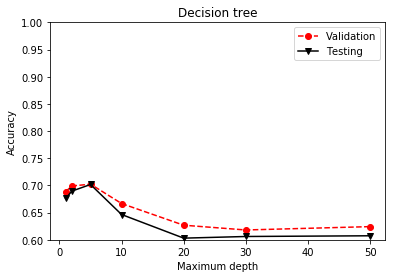

In [19]:

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1, 2, 5, 10, 20, 30, 50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X5_train, Y5_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X5_train, Y5_train)
    Y5_predTest = clf.predict(X5_test)
    testAcc[index] = accuracy_score(Y5_test, Y5_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

 Add the preciption attribute to the model.

In [20]:
data2 = pd.read_csv('1715923.csv')
data2['NAME'].drop_duplicates('first')# how many stations used


0        DETROIT CITY AIRPORT, MI US
7305    DETROIT METRO AIRPORT, MI US
Name: NAME, dtype: object

In [21]:
ONE_AIRPORT = data2[(data2['STATION']=='USW00094847') ]
#| 
# USW0014822 = DETROIT CITY AIRPORT, MI US
# USW00094847 = DETROIT METRO AIRPORT, MI US
Z6 = ONE_AIRPORT[['TMIN','TMAX','WT08','AWND','WT13','PRCP']] 
Y6 = Z6[['WT08']] # smoke or haze
X6 = Z6[['TMIN','TMAX','AWND','PRCP']] 
X_6 = Z6[['WT13']] # 
X_6 = X_6.fillna(0)
np.where(np.isnan(X6))
X6.head()

,TMIN,TMAX,AWND,PRCP
7305,14.0,41.0,19.91,0.00
7306,35.0,49.0,20.36,0.00
7307,44.0,54.0,18.34,0.02
7308,34.0,52.0,6.26,0.42
7309,42.0,55.0,8.05,0.41


In [22]:
Y6 = Y6.fillna(0)
Y6 = Y6[5:]
Y6.head()

,WT08
7310,0.0
7311,0.0
7312,0.0
7313,0.0
7314,0.0


In [23]:
X6 = X6.fillna(X6.mean())
X6 = pd.concat([X6,X_6],axis=1)
np.where(np.isnan(X6))
X6.head()

,TMIN,TMAX,AWND,PRCP,WT13
7305,14.0,41.0,19.91,0.00,0.0
7306,35.0,49.0,20.36,0.00,0.0
7307,44.0,54.0,18.34,0.02,1.0
7308,34.0,52.0,6.26,0.42,1.0
7309,42.0,55.0,8.05,0.41,1.0


In [24]:
N = X6.shape[0]
N

# X_4 = pd.concat([X_4,X4[1:N-3].reset_index(),X4[2:N-2].reset_index(),X4[3:N-1].reset_index(),X4[4:N].reset_index()],axis=1)
X_6= pd.DataFrame( X6[4:N].values,columns=['TMIN5','TMAX5','AWND5','PRCP-5','WT13-5']).reset_index()
X_6 = pd.concat([X_6,X6[3:N-1].reset_index(),X6[2:N-2].reset_index(),X6[1:N-2].reset_index(),X6[0:N-3].reset_index()],axis=1)

X_6 = X_6.drop(columns=['index'])
X_6.columns = ['TMIN-1','TMAX-1','AWND-1','PRCP-1','WT13-1','TMIN-2','TMAX-2','AWND-2','PRCP-2','WT13-2','TMIN-3','TMAX-3','AWND-3','PRCP-3','WT13-3','TMIN-4','TMAX-4','AWND-4','PRCP-4','WT13-4','TMIN1-5','TMAX-5','AWND-5','PRCP-5','WT13-5']
X_6 = X_6[:-2]
X_6.head()

,TMIN-1,TMAX-1,AWND-1,PRCP-1,WT13-1,TMIN-2,TMAX-2,AWND-2,PRCP-2,WT13-2,...,TMIN-4,TMAX-4,AWND-4,PRCP-4,WT13-4,TMIN1-5,TMAX-5,AWND-5,PRCP-5,WT13-5
0,42.0,55.0,8.05,0.41,1.0,34.0,52.0,6.26,0.42,1.0,...,35.0,49.0,20.36,0.00,0.0,14.0,41.0,19.91,0.00,0.0
1,49.0,56.0,6.93,0.00,1.0,42.0,55.0,8.05,0.41,1.0,...,44.0,54.0,18.34,0.02,1.0,35.0,49.0,20.36,0.00,0.0
2,36.0,50.0,16.11,0.69,1.0,49.0,56.0,6.93,0.00,1.0,...,34.0,52.0,6.26,0.42,1.0,44.0,54.0,18.34,0.02,1.0
3,35.0,39.0,13.42,0.45,1.0,36.0,50.0,16.11,0.69,1.0,...,42.0,55.0,8.05,0.41,1.0,34.0,52.0,6.26,0.42,1.0
4,34.0,39.0,14.99,0.02,1.0,35.0,39.0,13.42,0.45,1.0,...,49.0,56.0,6.93,0.00,1.0,42.0,55.0,8.05,0.41,1.0


In [25]:
Y6.index = X_6.index
print(Y6.shape[0] == X_6.shape[0])

True


In [30]:
from sklearn.model_selection import train_test_split

X6_train, X6_test, Y6_train, Y6_test = train_test_split(X_6, Y6, test_size=0.3, random_state=1)

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X6_train, Y6_train)
Y6_pred = clf.predict(X6_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y6_test, Y6_pred)

0.7039130434782609

Best hyperparameter, maxdepth = 5
Test Accuracy = 0.7039130434782609


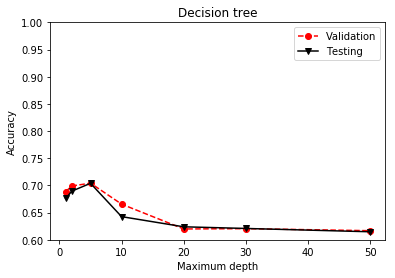

In [27]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1, 2, 5, 10, 20, 30, 50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X6_train, Y6_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X6_train, Y6_train)
    Y6_predTest = clf.predict(X6_test)
    testAcc[index] = accuracy_score(Y6_test, Y6_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])

In [54]:
ONE_AIRPORT = data2[(data2['STATION']=='USW00094847') ]
#| 
# USW0014822 = DETROIT CITY AIRPORT, MI US
# USW00094847 = DETROIT METRO AIRPORT, MI US
Z6 = ONE_AIRPORT[['TMIN','TMAX','WT08','AWND','WT13']] 
Y6 = Z6[['WT08']] # smoke or haze
X6 = Z6[['TMIN','TMAX']] 
X_6 = Z6[['WT13']] # 
X_6 = X_6.fillna(0)
np.where(np.isnan(X6))
X6.head()

,TMIN,TMAX
7305,14.0,41.0
7306,35.0,49.0
7307,44.0,54.0
7308,34.0,52.0
7309,42.0,55.0


In [55]:
Y6 = Y6.fillna(0)
Y6 = Y6[5:]
Y6.head()

,WT08
7310,0.0
7311,0.0
7312,0.0
7313,0.0
7314,0.0


In [56]:
X6 = X6.fillna(X6.mean())
X6 = pd.concat([X6,X_6],axis=1)
np.where(np.isnan(X6))
X6.head()
N = X6.shape[0]
N

# X_4 = pd.concat([X_4,X4[1:N-3].reset_index(),X4[2:N-2].reset_index(),X4[3:N-1].reset_index(),X4[4:N].reset_index()],axis=1)
X_6= pd.DataFrame(  X6[4:N].values,columns=['TMIN5','TMAX5','WT13-5']).reset_index()
X_6 = pd.concat([X_6,X6[3:N-1].reset_index(),X6[2:N-2].reset_index(),X6[1:N-2].reset_index(),X6[0:N-3].reset_index()],axis=1)
X_6 = X_6.drop(columns=['index'])
X_6 = X_6[:-2]
X_6.head()

,TMIN5,TMAX5,WT13-5,TMIN,TMAX,WT13,TMIN,TMAX,WT13,TMIN,TMAX,WT13,TMIN,TMAX,WT13
0,42.0,55.0,1.0,34.0,52.0,1.0,44.0,54.0,1.0,35.0,49.0,0.0,14.0,41.0,0.0
1,49.0,56.0,1.0,42.0,55.0,1.0,34.0,52.0,1.0,44.0,54.0,1.0,35.0,49.0,0.0
2,36.0,50.0,1.0,49.0,56.0,1.0,42.0,55.0,1.0,34.0,52.0,1.0,44.0,54.0,1.0
3,35.0,39.0,1.0,36.0,50.0,1.0,49.0,56.0,1.0,42.0,55.0,1.0,34.0,52.0,1.0
4,34.0,39.0,1.0,35.0,39.0,1.0,36.0,50.0,1.0,49.0,56.0,1.0,42.0,55.0,1.0


In [57]:
Y6.index = X_6.index
print(Y6.shape[0] == X_6.shape[0])

True


In [58]:
from sklearn.model_selection import train_test_split

X6_train, X6_test, Y6_train, Y6_test = train_test_split(X_6, Y6, test_size=0.3, random_state=1)

from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X6_train, Y6_train)
Y6_pred = clf.predict(X6_test)

from sklearn.metrics import accuracy_score

accuracy_score(Y6_test, Y6_pred)

0.671304347826087

Best hyperparameter, maxdepth = 1
Test Accuracy = 0.6760869565217391


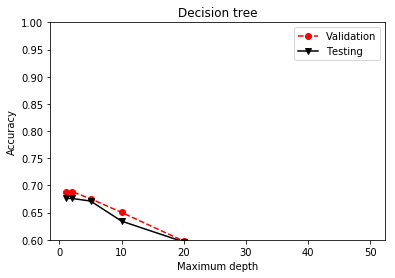

In [59]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

maxdepths = [1, 2, 5, 10, 20, 30, 50]
validationAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))
index = 0

np.random.seed(1)
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    scores = cross_val_score(clf, X6_train, Y6_train, cv=10)
    validationAcc[index] = np.mean(scores)
    clf.fit(X6_train, Y6_train)
    Y6_predTest = clf.predict(X6_test)
    testAcc[index] = accuracy_score(Y6_test, Y6_predTest)
    index += 1
    
plt.plot(maxdepths, validationAcc, 'ro--', maxdepths, testAcc, 'kv-')
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.title('Decision tree')
plt.legend(['Validation','Testing'])
plt.ylim([0.6,1.0])

bestHyperparam = np.argmax(validationAcc)
print('Best hyperparameter, maxdepth =', maxdepths[bestHyperparam])
print('Test Accuracy =', testAcc[bestHyperparam])